# Faridat Lawal
## DTSC 710
## Assignment 5
## April 8th, 2022

In [128]:
# Import and store packages needed for classification and visualization 
import pandas as pd # save package name under variable name for easier access/usage
import numpy as np # save package name under variable name for easuer acces/usage
from sklearn.model_selection import KFold # split data into train and test data
from sklearn.neural_network import MLPClassifier # import package/library to conduct classification performance of an MLP NN classifier
from sklearn.multiclass import OneVsRestClassifier # import store package to aid in plot for multiclass roc graph
from sklearn.preprocessing import StandardScaler # import packages to standardize and scale dataset for MLP classifier
import matplotlib.pyplot as plt # import package to plot and show graph of ROC for classes 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc # compute accuracy_score, classification report and confusion matrix for MLP classifier model; will aid in creation and calculation of auc and plot roc
from sklearn.preprocessing import label_binarize # import package to binarize classes in accelerometer dataset

In [75]:
# Import dataset and check for null values 
accel = pd.read_csv("/Users/faridatlawal/DTSC710/Assignment5/accelerometer.csv", header=0) # read in dataset from file on computer and save to a variable name for access in python
accel.isnull().sum() # check dataset for null values 
accel

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172


In [165]:
# Split dataset into X and y for training and testing
X = accel.iloc[:,1:] # creates a dataframe of all features needed for training and testing in the accelerometer dataset this will only include 4 columns  
y = accel.iloc[:,-5] # creates a dataframe for target variable/classes 

,pctid,x,y,z
0,20,1.004,0.090,-0.125
1,20,1.004,-0.043,-0.125
2,20,0.969,0.090,-0.121
3,20,0.973,-0.012,-0.137
4,20,1.000,-0.016,-0.121
...,...,...,...,...
152995,100,1.051,0.090,-0.262
152996,100,0.918,0.039,-0.129
152997,100,1.156,-0.094,-0.227
152998,100,0.934,0.203,-0.172


In [77]:
# Implement K Fold Cross Validation 
k = 5 # save number of folds to variable name for easier access
cv = KFold(k, random_state=42, shuffle=True) # create 5-fold cross validation that will be used to train and test our feature and target datasets

In [166]:
# Standardize/scale dataset
sc = StandardScaler() # save package name to variable for easier access/usage
sc.fit(X) # fit X dataset to standard scaler function
x=sc.transform(X) # transform values in X dataset and store new values in variable name 

array([[-1.63299316,  0.01082468,  0.11398969, -0.01398598],
       [-1.63299316,  0.01082468, -0.06511094, -0.01398598],
       [-1.63299316, -0.03439754,  0.11398969, -0.00624913],
       ...,
       [ 1.63299316,  0.20721833, -0.13378863, -0.21127571],
       [ 1.63299316, -0.07961976,  0.2661579 , -0.10489399],
       [ 1.63299316,  0.26277706, -0.24421158,  0.43861987]])

In [153]:
# MLP Neural Network Classifier
mlp = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(200, 150, 100), max_iter=100, random_state=42)) # create and store MLP classifier function with 3 hidden layers of sizes 150, 100 and 50 with a maximum iteration of 50 using the OVR classifier because dataset has 3 classes 

acc_score = [] # empty array that will hold accuracy score for each fold
for train_index, test_index in cv.split(x): # creates for loop that will loop through each instance in the feature dataset and apply Kfold function to create training and testing sets
    X_train, X_test = x[train_index,:], x[test_index,:] # creates X train and test datasets and stores them
    y_train, y_test = y[train_index], y[test_index] # creates y train and test datasets and stores them
    mlp.fit(X_train, y_train) # fit the x and y training sets to the MLP classifier
    y_preds = mlp.predict(X_test) # predict the y target varaible/value from the provided X testing set
    pred_prob = mlp.predict_proba(X_test) # calculate and store prediction probabilities to use for ROC graph
    acc = accuracy_score(y_test, y_preds) # calculates the overall accuracy of the mlp classifier model performance for each fold
    acc_score.append(acc)# appends/stores this accuracy value for each fold into empty array created above

acc_score # returns the accuracy score of the mlp classifier calculated for each fold 

/Users/faridatlawal/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/faridatlawal/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/faridatlawal/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/faridatlawal/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.wa

[0.7366339869281046,
 0.7421895424836601,
 0.7377450980392157,
 0.7372222222222222,
 0.7333660130718954]

Overall Accuracy: 0.7374313725490196
              precision    recall  f1-score   support

           1       0.70      0.63      0.66     10181
           2       0.65      0.70      0.67     10164
           3       0.85      0.87      0.86     10255

    accuracy                           0.73     30600
   macro avg       0.73      0.73      0.73     30600
weighted avg       0.73      0.73      0.73     30600



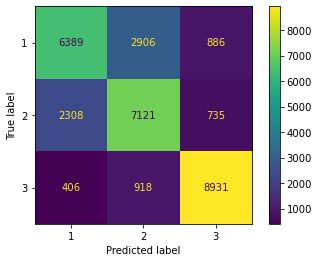

In [179]:
# Compute Overall Accuracy, Confusion Matrix and Classification Report
print('Overall Accuracy:',np.mean(acc_score)) # calculates and returns the overall average of all 5 accuracy scores from 5-fold cross validation for the mlp classifier
cm_mlp = confusion_matrix(y_test, y_preds) # creates and stores the confusion matrix for the mlp classifier; will be used to calculate Specificity
print(classification_report(y_test, y_preds)) # prints classification report on mlp model; includes Sensitivity(Recall) and F1 scores for each class as well as precision and model accuracy
cmplt=ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds), display_labels=mlp.classes_) # creates a visual graph of the confusion matrix for the mlp classifier
cmplt.plot() # plots confucion matrix of mlp classifier

In [169]:
# Calculate Specificity for all three classes in accelerometer dataset
""" Assigning TP, TN, FN, & FP values to the proper class"""
TP1 = cm_mlp[0,0] # true positive value for Normal from confusion matrix for access/usage
TP2 = cm_mlp[1,1] # true positive value for Perpendicular from confusion matrix for access/usage
TP3 = cm_mlp[2,2] # true positive value for Opposite from confusion matrix for access/usage

FN1 = cm_mlp[0,1] + cm_mlp[0,2] # false negative value for Normal from confusion matrix for access/usage
FN2 = cm_mlp[1,0] + cm_mlp[1,2] # false negative value for Perpendicular from confusion matrix for access/usage
FN3 = cm_mlp[2,0] + cm_mlp[2,1] # false negative value for Opposite from confusion matrix for access/usage

TN1 = TP2 + cm_mlp[1,2] + cm_mlp[2,1] + TP3 # true negative value for Normal from confusion matrix for access/usage
TN2 = TP1 + cm_mlp[0,2] + cm_mlp[2,0] + TP3 # true negative value for Perpendicular from confusion matrix for access/usage
TN3 = TP1 + TP2 + cm_mlp[0,1] + cm_mlp[1,0] # true negative value for Opposite from confusion matrix for access/usage

FP1 = cm_mlp[1,0] + cm_mlp[2,0] # false positive value for Normal from confusion matrix for access/usage
FP2 = cm_mlp[0,1] + cm_mlp[2,1] # false positive value for Perpendicular from confusion matrix for access/usage
FP3 = cm_mlp[0,2] + cm_mlp[1,2] # false positive value for Opposite from confusion matrix for access/usage

""" Specificity MLP: TN/TN+FP"""
print("Class 1 Specificity:", TN1/(TN1 + FP1)) # calculates and prints the specificity rate of Normal for model performance based on values from confusion matrix
print("Class 2 Specificity:", TN2/(TN2 + FP2)) # calculates and prints the specificity rate of Perpendicular for model performance based on values from confusion matrix
print("Class 3 Specificity:", TN3/(TN3 + FP3)) # calculates and prints the specificity rate of Opposite for model performance based on values from confusion matrix

Class 1 Specificity: 0.8670845780890347
Class 2 Specificity: 0.8128792327265609
Class 3 Specificity: 0.9203244040304743


In [175]:
# Binarize class labels from dataset
yt_binarize = label_binarize(y_test, classes= np.unique(y_test)) # binarizes the classes for ROC graph 
labels = ('Normal', 'Perpendicular', 'Opposite') # stores class label names in variable

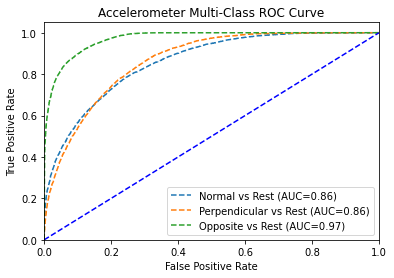

In [176]:
# Plotting ROC and AUC
fpr = {} # creates an empty dictionary that will hold the false positive rate for each class 
tpr = {} # creates an empty dictionary that will hold the true positive rate for each class 
thr = {} # creates an empty dictionary that will hold the threshold 
roc_auc = dict() # creates an empty dictionary that will hold the AUC score for each class 
n_class = len(labels) # stores the value of classes as a variable

for i in range(n_class): # creates for loop for that will loop only 3 times (this is the number of classes we have for accelerometer dataset)
    fpr[i], tpr[i], thr[i] = roc_curve(yt_binarize[:,i], pred_prob[:,i]) # calculates, creates and stores the fpr, tpr and threshold for each class in the accelerometer dataset
    roc_auc[i] = auc(fpr[i], tpr[i]) # calculates, creates and stores the auc score for each class in the accelerometer dataset
    
    #plotting of ROC and AUC score for each class
    plt.plot(fpr[i], tpr[i], linestyle='--',
            label= '%s vs Rest (AUC=%0.2f)'%(labels[i], roc_auc[i]))
    
    
plt.plot([0,1], [0,1], 'b--') #plot baseline
plt.xlim([0,1]) # set x axis limitation
plt.ylim([0,1.05]) # set y axis limitation
plt.title('Accelerometer Multi-Class ROC Curve') # add title to graph
plt.xlabel('False Positive Rate') # add xlabel to graph
plt.ylabel('True Positive Rate') # add ylabel to graph
plt.legend(loc='lower right') # add legend and set location as bottom right of graph
plt.show() # display/show the graph created